In [3]:
# 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
word = np.load("/Users/yingzhu/Desktop/science2k-doc-word.npy")
word2 = np.load("/Users/yingzhu/Desktop/science2k-word-doc.npy")
vocab = np.genfromtxt("/Users/yingzhu/Desktop/science2k-vocab.txt", dtype=np.str,delimiter="\n")
titles = np.genfromtxt("/Users/yingzhu/Desktop/science2k-titles.txt", dtype=np.str,delimiter="\n")

In [4]:
# Cluster the document using k_means and various values of k (go up to at least k=20)
from sklearn.cluster import KMeans
def kmean_k(features, k):
    assignment={}
    center={}
    sse=[]
    for i in range(1,k+1):
        kmean = KMeans(n_clusters=i).fit(features)
        sse.append(sum(np.min(cdist(features, kmean.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])
        cur_label = kmean.labels_
        cur_center = kmean.cluster_centers_
        cur_res = {}
        for j in range(len(cur_label)):
            if cur_res.get(cur_label[j]) is None:
                cur_res[cur_label[j]] = [j]
            else:
                cur_res.get(cur_label[j]).append(j)
        assignment[i]=cur_res
        center[i]=cur_center
    return assignment,center,sse

In [417]:
assign, center,sse = kmean_k(word,20)

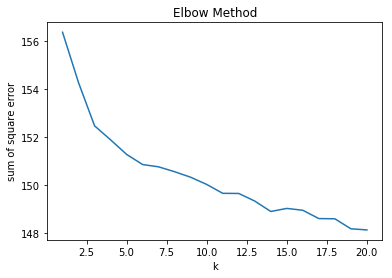

In [419]:
# choosing one k from k=1~20 using elbow algorithm
K=list(range(1,21))
plt.plot(K,sse)
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.title('Elbow Method')
plt.show()

In [381]:
# print the center for k=3  (huge drop when k =3)
center.get(3)

array([[  9.92354925,   0.58430091,   9.08135098, ...,  -0.62245703,
         -0.73309419,  -0.51843179],
       [  0.78401487,   2.14425614,   8.8853199 , ...,  -0.37651121,
         -0.46566337,  -0.46566337],
       [ 10.16030495,   8.35144084,   9.14302127, ...,  -0.570492  ,
         -0.59905373,  -0.78433723]])

In [420]:
# choose k =3, report 10 closest to cluster center document of each cluster
center_k3= center.get(3)
assign_k3 = assign.get(3) 
# number of nodes assigned in each cluster
print(len(assign_k3.get(2)))
print(len(assign_k3.get(1)))
print(len(assign_k3.get(0)))

411
380
582


In [422]:
# choose k =6, report 10 closest to cluster center document of each cluster
center_k6= center.get(6)
assign_k6 = assign.get(6) 
# number of nodes assigned in each cluster
print(len(assign_k6.get(5)))
print(len(assign_k6.get(4)))
print(len(assign_k6.get(3)))
print(len(assign_k6.get(2)))
print(len(assign_k6.get(1)))
print(len(assign_k6.get(0)))

287
92
501
209
187
97


In [11]:
def top10_index(assign,center,word):
    distance=[1000]*len(word)
    for i in assign:
        cur_dist = np.linalg.norm(word[i]-center)
        distance[i] = cur_dist
    return np.argsort(distance)[:10]

In [386]:
top10_file=[]
for i in range(3):
    print("The index of top 10 document for cluster", i+1, "is ")
    top10_file.append(top10_index(assign_k3.get(i),center_k3[i],word));
    print(top10_file[i])

The index of top 10 document for cluster 1 is 
[1281  139 1283  724  587  797 1227  715  159 1359]
The index of top 10 document for cluster 2 is 
[519 574 453 499   0  90 124 123 122 777]
The index of top 10 document for cluster 3 is 
[ 997  968  541 1314  983  767  370  704 1000 1032]


In [408]:
# report the titles associated of top 10 documents
def printtitle(top10_file,titles):
    top10_title=[]
    for i in range(3):
        temp_title=[]
        for j in range(10):
            temp_title.append(titles[top10_file[i][j]])
        top10_title.append(temp_title)
        #print("top 10 docuemnt's titles for cluster", i+1, "is ")
        #print(top10_title[i])
    return top10_title

In [409]:
printtitle(top10_file,titles)

[['"The Formation of Chondrules at High Gas Pressures in the Solar Nebula"',
  '"Population Dynamical Consequences of Climate Change for a Small Temperate Songbird"',
  '"Nitric Acid Trihydrate (NAT) in Polar Stratospheric Clouds"',
  '"Subducted Seamount Imaged in the Rupture Zone of the 1946 Nankaido Earthquake"',
  '"A Monoclinic Post-Stishovite Polymorph of Silica in the Shergotty Meteorite"',
  '"Synthesis and Characterization of Helical Multi-Shell Gold Nanowires"',
  '"Crossing the Hopf Bifurcation in a Live Predator-Prey System"',
  '"Earth\'s Enigmatic Interface"',
  '"Ambipolar Pentacene Field-Effect Transistors and Inverters"',
  '"Reconstruction of the Amazon Basin Effective Moisture Availability over the past 14,000 Years"'],
 ['"Algorithmic Gladiators Vie for Digital Glory"',
  '"Reopening the Darkest Chapter in German Science"',
  '"Information Technology Takes a Different Tack"',
  '"National Academy of Sciences Elects New Members"',
  '"Archaeology in the Holy Land"',


In [5]:
# report titles associated with the lowest distance
mean_word = np.mean(word,axis=0)

In [325]:
def close_cluster(total_mean, cluster_mean):
    mean_dis =[]
    for i in range(len(cluster_mean)):
        cur_mean_dist = np.linalg.norm(total_mean-cluster_mean[i])
        mean_dis.append(cur_mean_dist)
    return mean_dis

In [326]:
mean_dist = close_cluster(mean_word, center_k5)

In [327]:
np.argsort(mean_dist)

array([3, 4, 2, 0, 1])

In [332]:
# function to pick up titles in chosen cluster
# from above, class 4 has the lowest distance, we will output all the document in class 4
document_4 = assign_k5[3]

In [333]:
len(document_4)

413

In [6]:
# (b) using k-means and various values of k
term_assign,term_center,term_sse = kmean_k(word2,20)

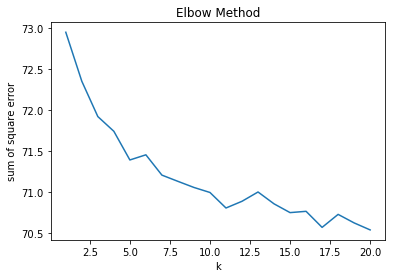

In [8]:
# choosing one k from k=1~20 using elbow algorithm
K=list(range(1,21))
plt.plot(K,term_sse)
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.title('Elbow Method')
plt.show()

In [435]:
# choose k =3
term_center_k3= term_center.get(3)
term_assign_k3 = term_assign.get(3) 
print(len(term_assign_k3.get(2)))
print(len(term_assign_k3.get(1)))
print(len(term_assign_k3.get(0)))

4264
549
663


In [9]:
# choose k =5
term_center_k5= term_center.get(5)
term_assign_k5 = term_assign.get(5)
print(len(term_assign_k5.get(4)))
print(len(term_assign_k5.get(3)))
print(len(term_assign_k5.get(2)))
print(len(term_assign_k5.get(1)))
print(len(term_assign_k5.get(0)))

3554
645
453
155
669


In [28]:
term_top10_file=[]
for i in range(5):
    print("The index of top 10 terms for cluster", i+1, "is ")
    term_top10_file.append(top10_index(term_assign_k5.get(i),term_center_k5[i],word2));
    print(top10_index(term_assign_k5.get(i),term_center_k5[i],word2))

The index of top 10 terms for cluster 1 is 
[3030 4043 2312 3607 2197 3082 2140 2065 4294 3823]
The index of top 10 terms for cluster 2 is 
[ 13 819 800 935 546 288 324 551 728 369]
The index of top 10 terms for cluster 3 is 
[3711 2760 3118 3973 4144 3742 3976 3456 3361 3227]
The index of top 10 terms for cluster 4 is 
[5064 4380 4744 4403 5023 4230 5371 4764 4278 4921]
The index of top 10 terms for cluster 5 is 
[5279 5322 5261 4995 4975 5458 5454 4535 5312 3399]


In [29]:
# function to print term associated with top 10
def printterm(top10_file,vocab,num):
    top10_title=[]
    for i in range(num):
        temp_title=[]
        for j in range(10):
            temp_title.append(vocab[top10_file[i][j]])
        top10_title.append(temp_title)
        #print("top 10 docuemnt's titles for cluster", i+1, "is ")
        #print(top10_title[i])
    return top10_title

In [30]:
printterm(term_top10_file,vocab,5)

[['resonant',
  'anisotropic',
  'fermi',
  'quasi',
  'conductivity',
  'radial',
  'tunneling',
  'metallic',
  'lying',
  'linearly'],
 ['start',
  'gray',
  'decrease',
  'extent',
  'error',
  'res',
  'rev',
  'fraction',
  'apparent',
  'maximum'],
 ['immunoblotting',
  'immunoblot',
  'immunoprecipitated',
  'abolished',
  'mediates',
  'embo',
  'polyacrylamide',
  'biophys',
  'plasmids',
  'immunoprecipitation'],
 ['schools',
  'weapons',
  'recalls',
  'clinton',
  'geneticist',
  'security',
  'prize',
  'fight',
  'finished',
  'spending'],
 ['aptamers',
  'lcts',
  'rory',
  'dnag',
  'proteorhodopsin',
  'lg268',
  'trxr',
  'nompc',
  'doxy',
  'ag7']]

In [31]:
### try something new: using PCA and plot 2D 
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(word)

In [467]:
pca_trans

array([[-38.68626549, -14.1271654 ],
       [-40.04599574, -15.09354899],
       [-29.11225407, -12.9221359 ],
       ..., 
       [ 23.79299641,   7.9209431 ],
       [  6.01144354,  34.5551411 ],
       [-12.63138606,  24.3775171 ]])

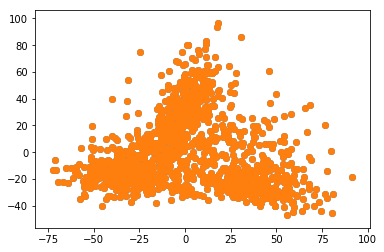

In [472]:
plt.scatter(pca_trans[:,0],pca_trans[:,1])
plt.show()

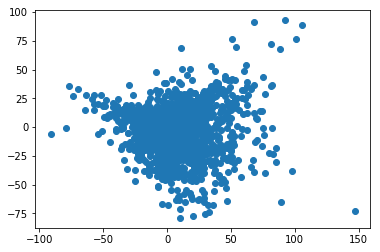

In [32]:
## 2D check
pca = PCA(n_components=2)
pca_trans_term = pca.fit_transform(word2)
plt.scatter(pca_trans_term[:,0],pca_trans_term[:,1])
plt.show()

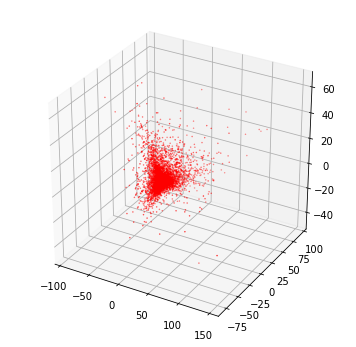

In [34]:
#3D check

pca = PCA(n_components=3)
pca_trans_term = pca.fit_transform(word2)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_trans_term[:,0],pca_trans_term[:,1],pca_trans_term[:,2],c='r', marker='o',s=.2)
plt.show()

In [478]:
#1D check
pca = PCA(n_components=1)
pca_trans_term = pca.fit_transform(word2)

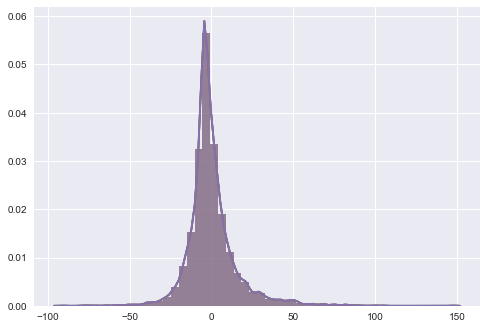

In [497]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(pca_trans_term)
plt.show()